In [275]:
import pandas as pd
import numpy as np
df= pd.read_csv('heart.csv')
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


(array([410.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 508.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

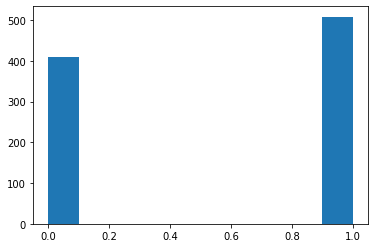

In [276]:
plt.hist(df.HeartDisease)

In [277]:
df1=df
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [278]:
from scipy import stats
z= stats.zscore(df1.RestingBP)
df1['Oldpeakzscore']=z
df1[['Oldpeak', 'Oldpeakzscore']].describe().round(3)

,Oldpeak,Oldpeakzscore
count,918.000,918.000
mean,0.887,0.000
std,1.067,1.001
min,-2.600,-7.155
25%,0.000,-0.670
50%,0.600,-0.130
75%,1.500,0.411
max,6.200,3.653


In [281]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Oldpeakzscore
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0,0.410909
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1,1.491752
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0,-0.129513
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1,0.302825
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0,0.951331
...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1,-1.210356
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1,0.627078
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1,-0.129513
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1,-0.129513


In [282]:
def outliers_index(col):
    zscorecol= abs(stats.zscore(col))
    outlier_status= np.where(zscorecol>3, True, False)
    idx=pd.Series(outlier_status, index=col.index )
    return idx[idx==True].index


In [283]:
def remove_outliers_throughindex(idx):
    df.drop(idx, inplace=True)
    return df


In [330]:
x= outliers_index(df.RestingBP)
remove_outliers_throughindex(x)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Oldpeakzscore
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0,0.410909
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1,1.491752
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0,-0.129513
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1,0.302825
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0,0.951331
...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1,-1.210356
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1,0.627078
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1,-0.129513
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1,-0.129513


In [332]:
x= outliers_index(df.Oldpeak)
remove_outliers_throughindex(x)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Oldpeakzscore
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0,0.410909
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1,1.491752
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0,-0.129513
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1,0.302825
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0,0.951331
...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1,-1.210356
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1,0.627078
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1,-0.129513
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1,-0.129513


In [339]:
x= outliers_index(df.Cholesterol)
remove_outliers_throughindex(x)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Oldpeakzscore
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0,0.410909
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1,1.491752
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0,-0.129513
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1,0.302825
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0,0.951331
...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1,-1.210356
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1,0.627078
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1,-0.129513
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1,-0.129513


In [343]:
x= outliers_index(df.MaxHR)
remove_outliers_throughindex(x)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Oldpeakzscore
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0,0.410909
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1,1.491752
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0,-0.129513
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1,0.302825
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0,0.951331
...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1,-1.210356
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1,0.627078
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1,-0.129513
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1,-0.129513


In [344]:
df= df.drop('Oldpeakzscore', axis= 'columns')


In [345]:
df


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1
